# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

## <span style="color:darkred">  SOLUTION </span>

First I will explain the method I used, then I will show the results.

#### METHOD

I organized the implementation of the GA through the use of three classes, $\texttt{vertices}$, $\texttt{specimen}$ and $\texttt{population}$.

In $\texttt{vertices}$ I implemented the structure of the vertices of the graph. Its data members are the labels of the vertices and the positions. The cities of the TSP are defined through this data structure. The cities can be initialized specifying their number and their geometry ($\texttt{CIRCLE}$ or $\texttt{SQUARE}$) in random positions, or by assigning them.

Then there is the class $\texttt{specimen}$, which implements a possible solution of the TSP.
The solutions are represented as suggested: using a one-dimensional integer representation where the integers sequence represents the order in which the cities are visited. The first city is arbitrarily always labeled as 1, and this condition, as well as the requirement that each city is visited once and only once are enforced through the method $\texttt{check}$.

A $\texttt{specimen}$ can be randomly initialized, or through input data. There are methods to compute the fitness of an individual (with both $L^1$ and $L^2$ norms) and to operate mutations on their (so to speak) DNA.

Three kinds of mutations are implemented: $\texttt{inversion}$, $\texttt{translation}$ and $\texttt{switching}$.

An $\texttt{inversion}$ takes two cities at random and inverts the sequence between them. For instance, starting from [1, 2, 3, 4, 5, 6], if 3 and 5 were selected, the mutated path would become [1, 2, 5, 4, 3, 6].

Then a $\texttt{translation}$ selects two points randomly and inserts the path they enclose between a point and its following. For instance, if [3,4] were to be placed between 5 and 6, the mutated path would be [1, 4, 6, 2, 5, 3]. The point 1 is always in the first position, then the other points are cycled to accomodate the sequence [3,4] between 5 and 6.

Lastly, $\texttt{switching}$ simply selects two cities randomly and swaps them, e.g. if 3 and 6 were picked, the resulting sequence would be [1, 2, 6, 4, 5, 3].

As for the $\texttt{population}$ class, its members are a collection of $\texttt{specimens}$. There are methods to initialize a population, to add members, to rank them on the basis of their fitness level, to access the required fitness information and to select and eliminate individuals through "natural selection". The selection operator uses the second method suggested in the assignment. A variant which uses the first method is also present, but it's commented out. It defines probabilities of selection simply proportional to the fitness level. However, this results in differences in probabilities that are negligible and fit individuals are basically selected just as frequently as unfit individuals. The selection process thus is unbiased and does not converge to an optimal solution. It seems that the probabilities of selection should be a somewhat more elaborate function of the fitness level in order to promote the fittest individuals in the population. The second approach seemed to me easier, and therefore I followed it.

The elimination process is based on a probability of selection proportional to the fitness level, and therefore is almost random, as just discussed. It still works because the selection method is biased towards the fittest individuals. Therefore there is no depletion of fit individuals in the population.

The crossover operator is implemented through the function $\texttt{breed}$, which takes as input two individuals from the parent population and is applied with a certain probability of crossover. It returns two individuals for the daughter generation. The method used is described in *Michalewicz Z., Fogel D.B, How to Solve it: Modern Euristics*, and is called order crossover (OX). It selects a subsequence between two random points in the DNA of both parents (the selected points are the same for both parents). Then it preserves part of the DNA of the parents and changes the other part. I kept fixed the part of the DNA external to the two selected points. The part taken from the other parent is chosen so that it mantains the relative order of the cities as they appear in the parent DNA.

For instance, if P1=[1,2,3,4,5,6] and P2=[1,5,4,3,6,2] and the sequence between positions number 3 and 5 is selected, then from P1 the sequence [3,4,5] would be subsituted, while from P2 it would be [4,3,6]. Now to substitute the sequence in P1 we take the sequence of P2 starting from the cut position, namely 4,3,6,2,1,5. Then we insert in P1 the available cities: 4 is available, 3 is available, 6 is not, 2 is not, 1 is not and 5 is available. Then the offspring would be O1=[1,2,4,3,5,6]. The other offspring is obtained in the same way: the candidates from P1 are 3,4,5,6,1,2, and the first availables are 3,4,6. Therefore O2=[1,5,3,4,6,2].

This operator preserves the constraints of a feasible solution, as it also results from the control $\texttt{check}$ method applied to each new individual generated.

#### RESULTS

I run the GA for $\texttt{Nc=34}$ cities for $\texttt{gen=200}$ generations, each generation made of $\texttt{Np=1000}$ individuals. I showed the results for the $\texttt{L1}$ norm, but in the data directory the data for the norm $\texttt{L2}$ are also available. Mutation probabilities are set to $\texttt{p_i=0.033}$, $\texttt{p_t=0.033}$ and $\texttt{p_s=0.033}$ for $\texttt{inversion}$, $\texttt{translation}$ and $\texttt{switching}$ respectively, while crossover probability is $\texttt{p_c=0.80}$.

The cities and the population are initialized randomly.

In the plots below, the $\texttt{CIRCLE}$ geometry seems to converge to the expected solution. For both geometries the algorithm seems to converge in fewer than 100 generations to a near optimal solution. In the case of the $\texttt{SQUARE}$ geometry it still improves after 150 generations, but it still can not be said for certain if it is a global optimum or not.

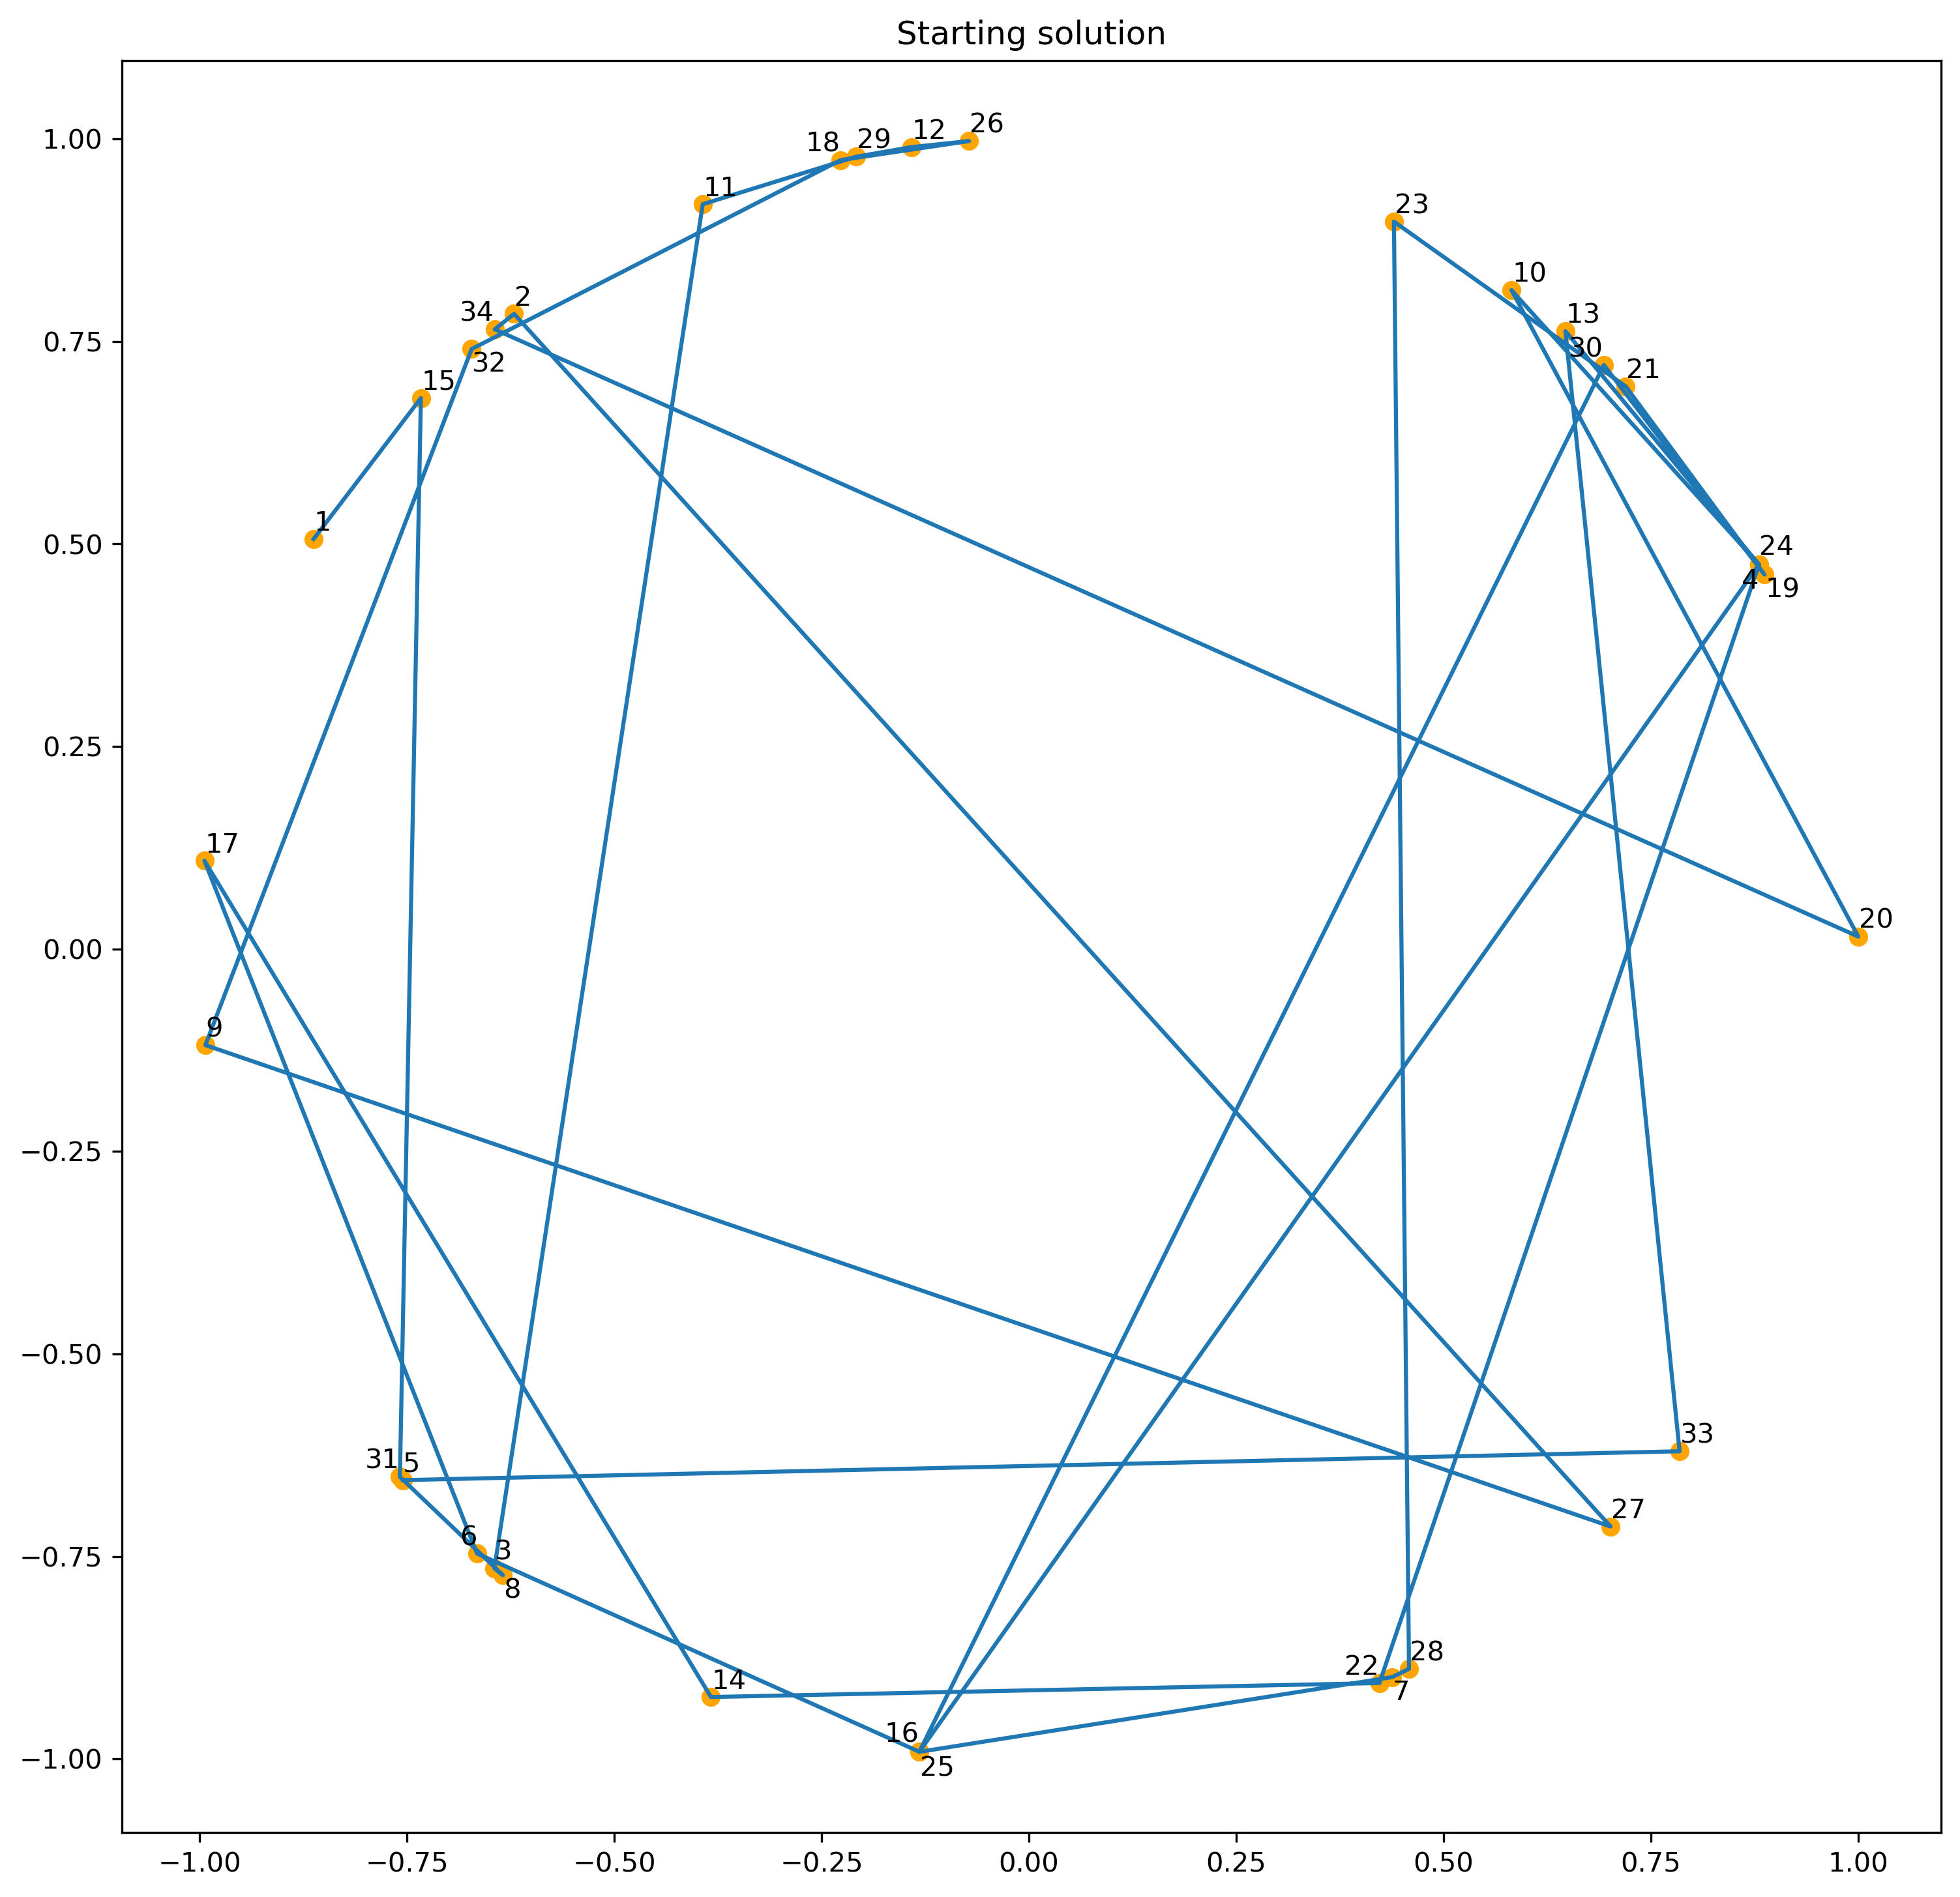

In [2]:
plt.subplots(1,1,figsize=(12,12), dpi=300)

x1,y1,labels1 = np.loadtxt("./sol/data/CIRCLE/L1/route_in.dat", usecols=(0,1,2), unpack=True)
labels1 = [int(label) for label in labels1]
plt.plot(x1,y1)
plt.scatter(x1,y1, color="orange")
plt.title("Starting solution")
texts = [plt.annotate(str(label), (x1[i], y1[i])) for i, label in enumerate(labels1)]
adjust_text(texts)

plt.show()

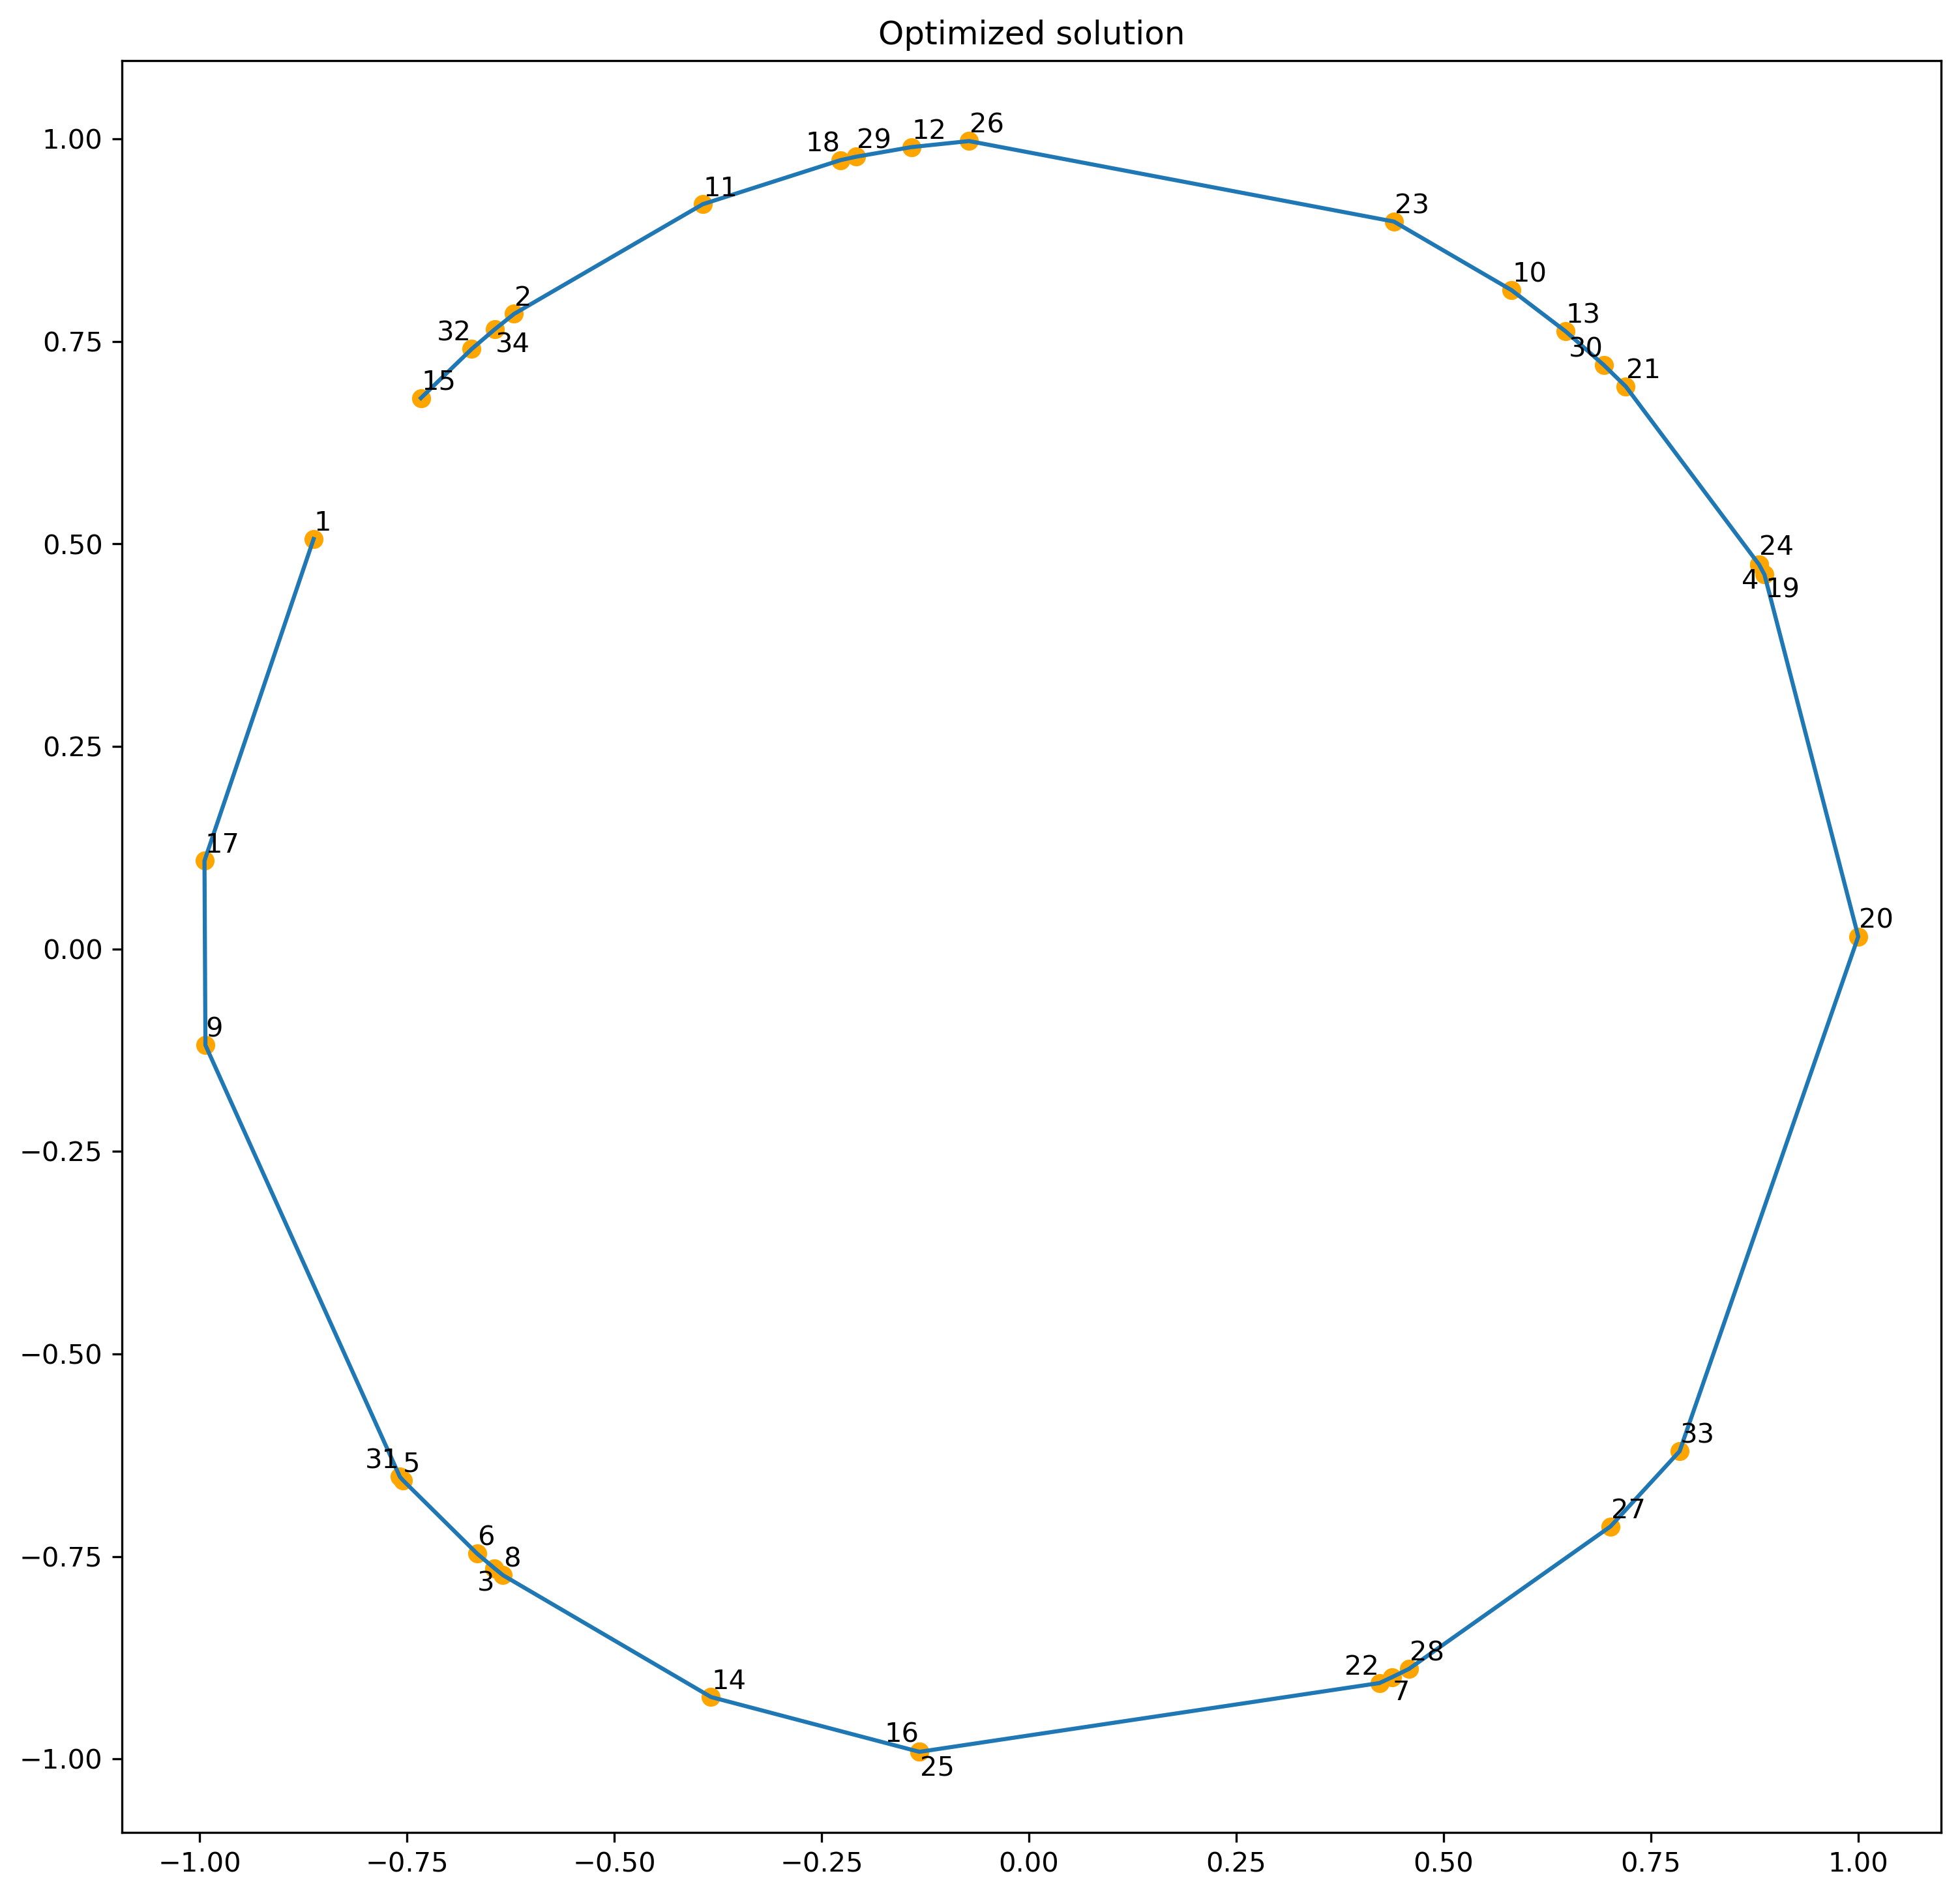

In [3]:
plt.subplots(1,1,figsize=(12,12), dpi=300)

x2,y2,labels2 = np.loadtxt("./sol/data/CIRCLE/L1/route_out.dat", usecols=(0,1,2), unpack=True)
labels2 = [int(label) for label in labels2]
plt.plot(x2,y2)
plt.scatter(x2,y2, color="orange")
plt.title("Optimized solution")
texts = [plt.annotate(str(label), (x2[i], y2[i])) for i, label in enumerate(labels2)]
adjust_text(texts)

plt.show()

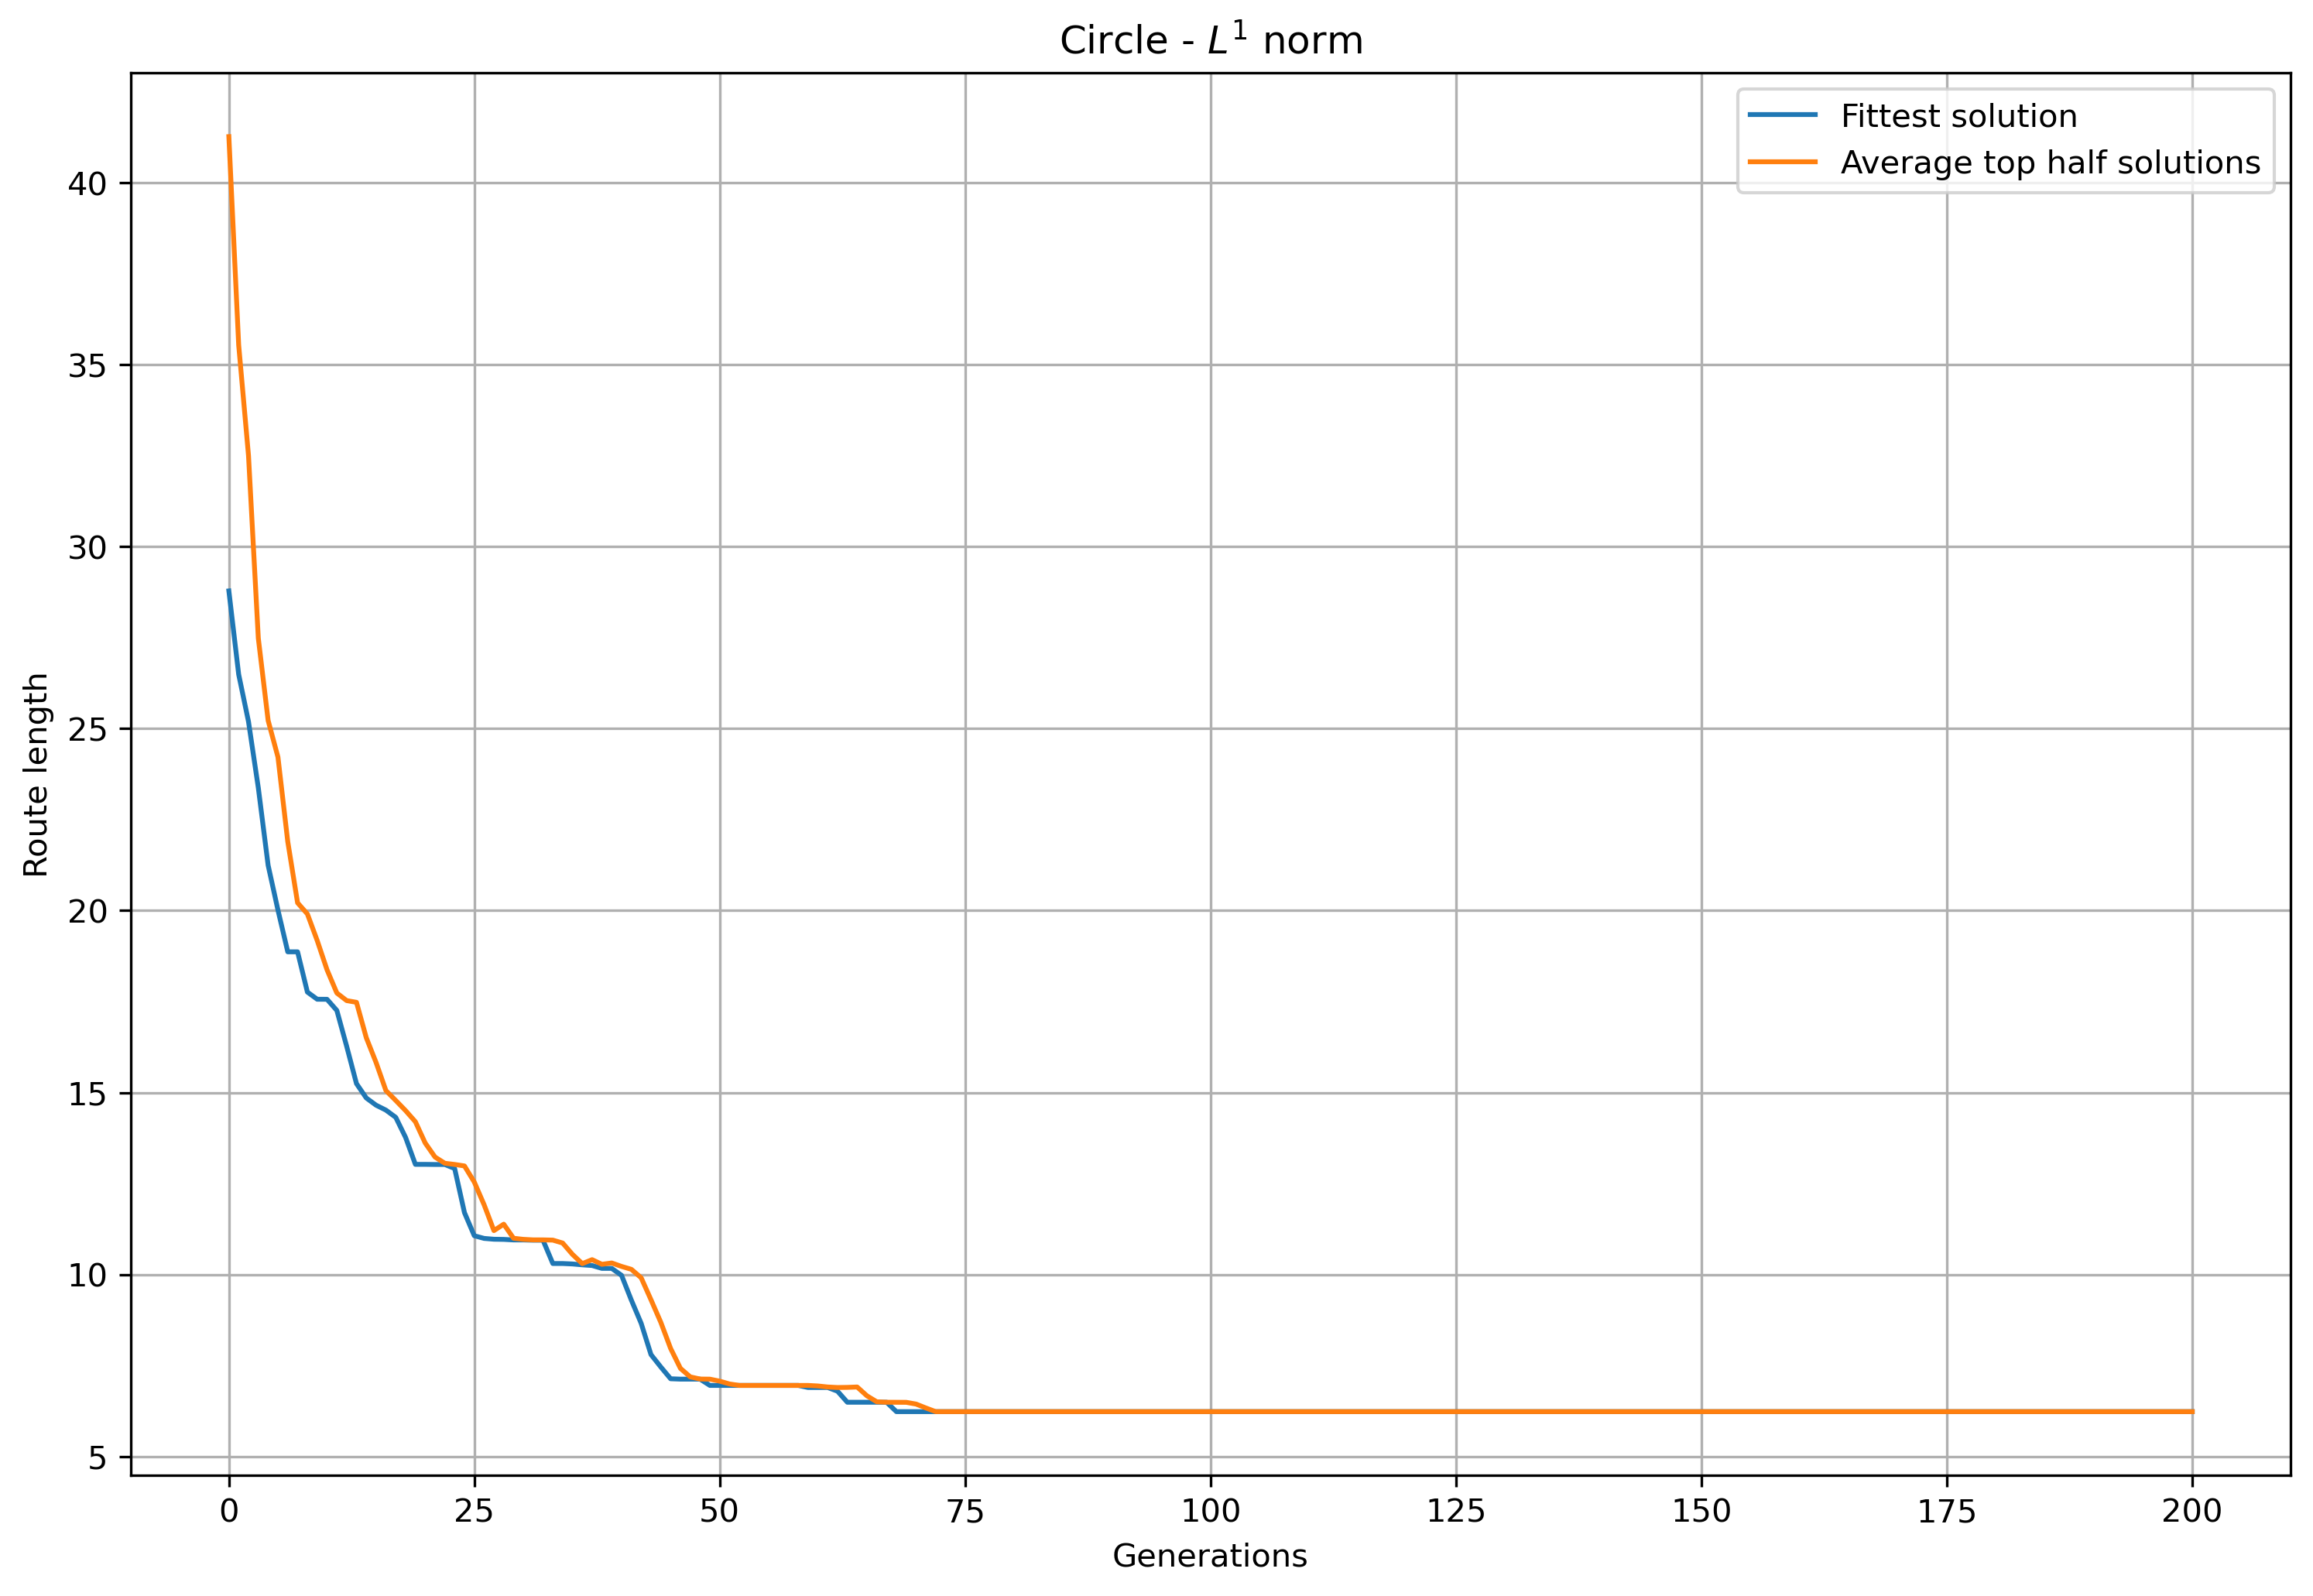

In [4]:
plt.subplots(1,1,figsize=(12,8), dpi=300)
n, f, avf = np.loadtxt("./sol/data/CIRCLE/L1/fitness.dat", usecols=(0,1,2), unpack=True)
plt.plot(n,f, label="Fittest solution")
plt.plot(n,avf, label="Average top half solutions")
plt.xlabel("Generations")
plt.ylabel("Route length")
plt.title("Circle - $L^1$ norm")
plt.legend()
plt.grid(True)
plt.show()

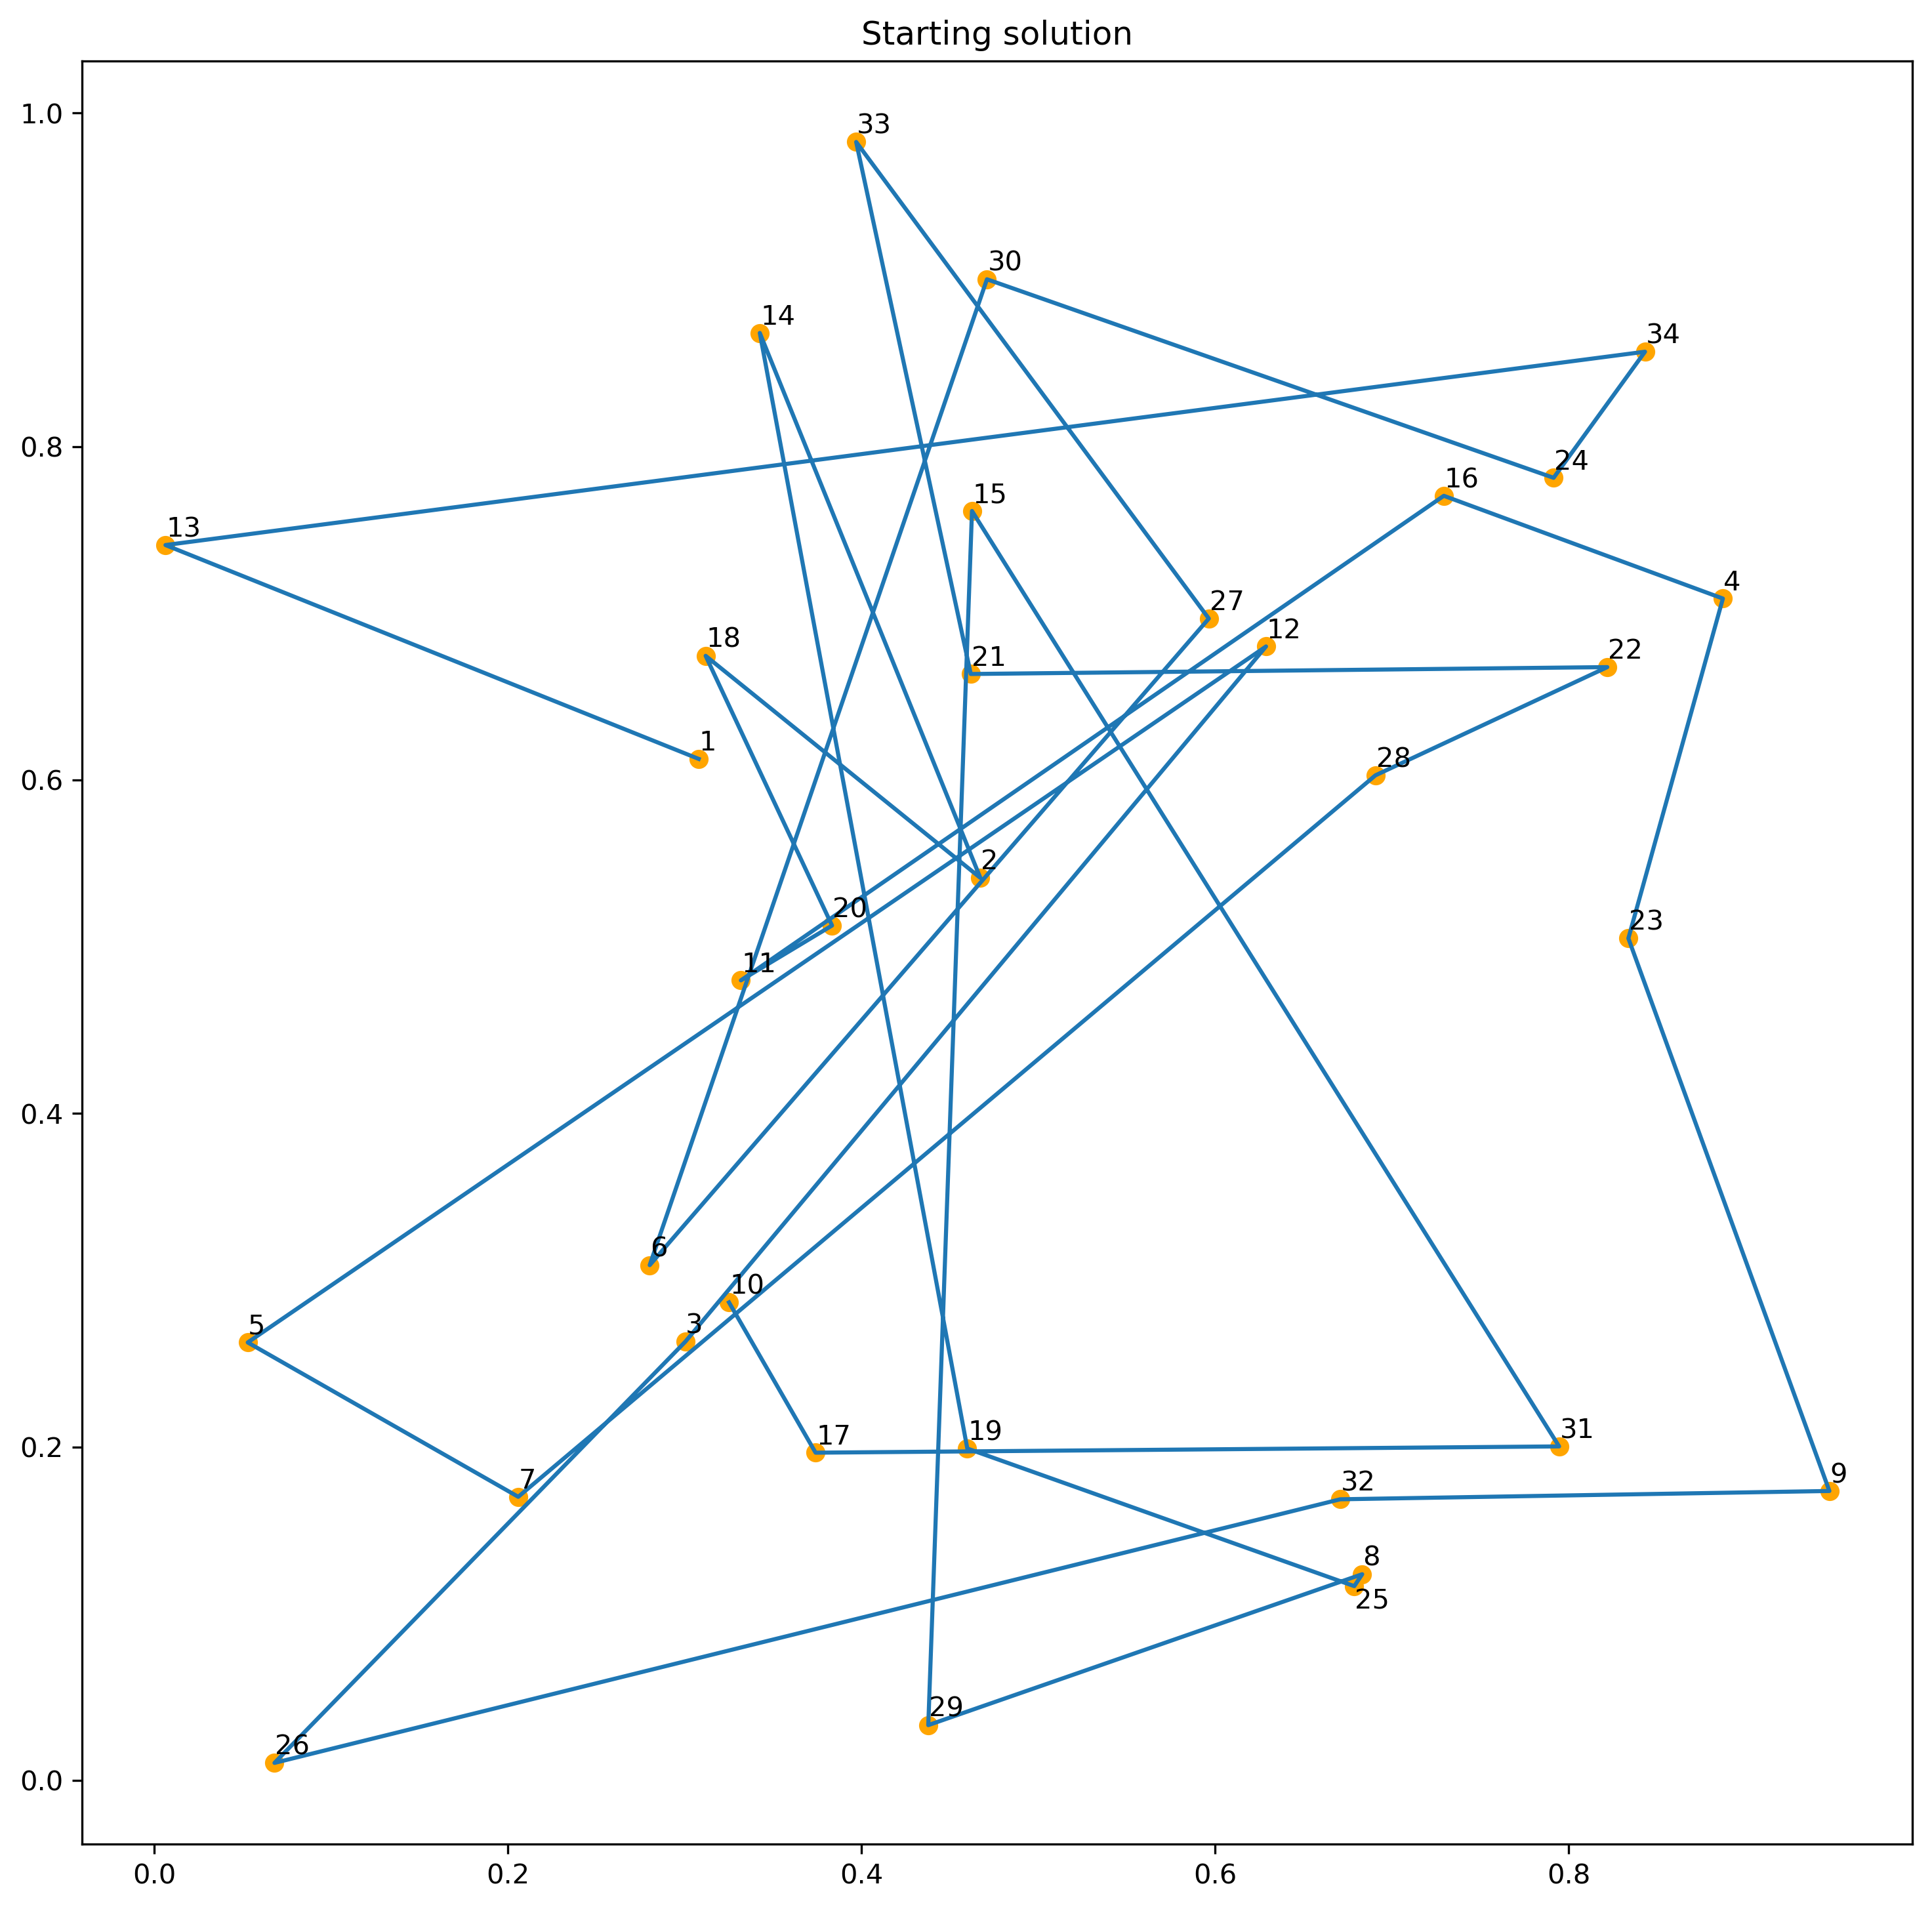

In [5]:
plt.subplots(1,1,figsize=(12,12), dpi=300)

x1,y1,labels1 = np.loadtxt("./sol/data/SQUARE/L1/route_in.dat", usecols=(0,1,2), unpack=True)
labels1 = [int(label) for label in labels1]
plt.plot(x1,y1)
plt.scatter(x1,y1, color="orange")
plt.title("Starting solution")
texts = [plt.annotate(str(label), (x1[i], y1[i])) for i, label in enumerate(labels1)]
adjust_text(texts)

plt.show()

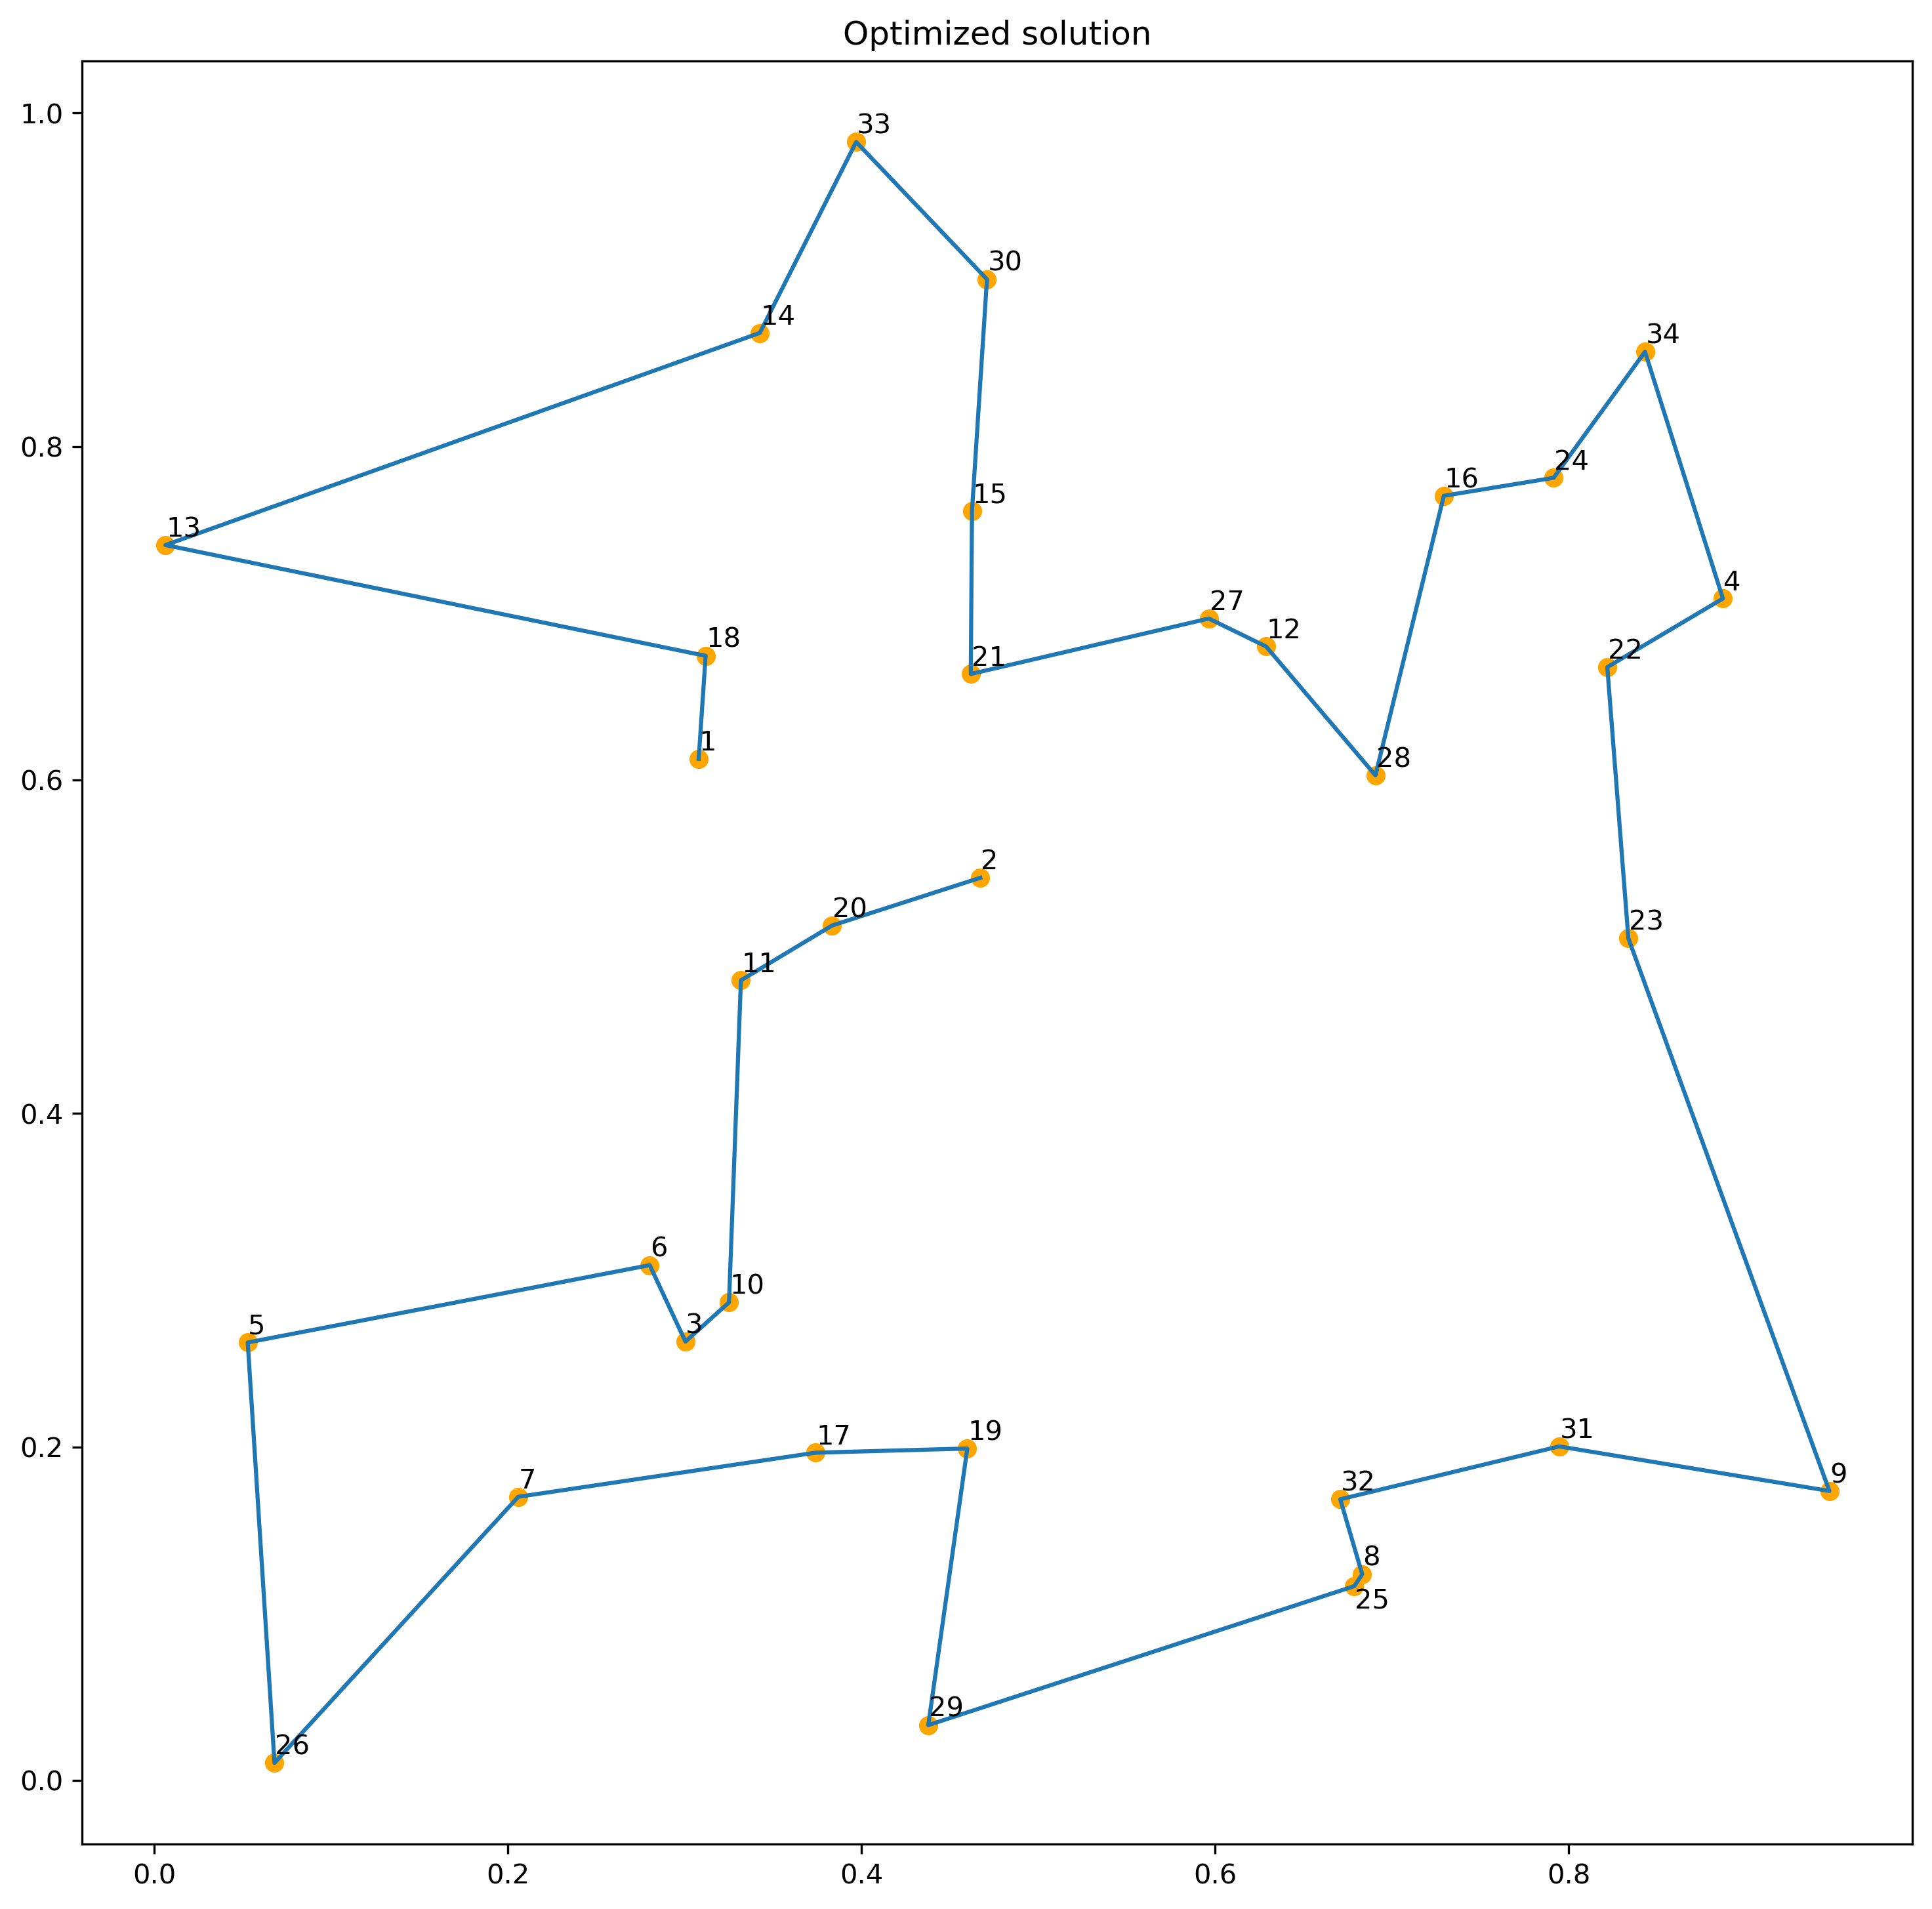

In [6]:
plt.subplots(1,1,figsize=(12,12), dpi=300)

x2,y2,labels2 = np.loadtxt("./sol/data/SQUARE/L1/route_out.dat", usecols=(0,1,2), unpack=True)
labels2 = [int(label) for label in labels2]
plt.plot(x2,y2)
plt.scatter(x2,y2, color="orange")
plt.title("Optimized solution")
texts = [plt.annotate(str(label), (x2[i], y2[i])) for i, label in enumerate(labels2)]
adjust_text(texts)

plt.show()

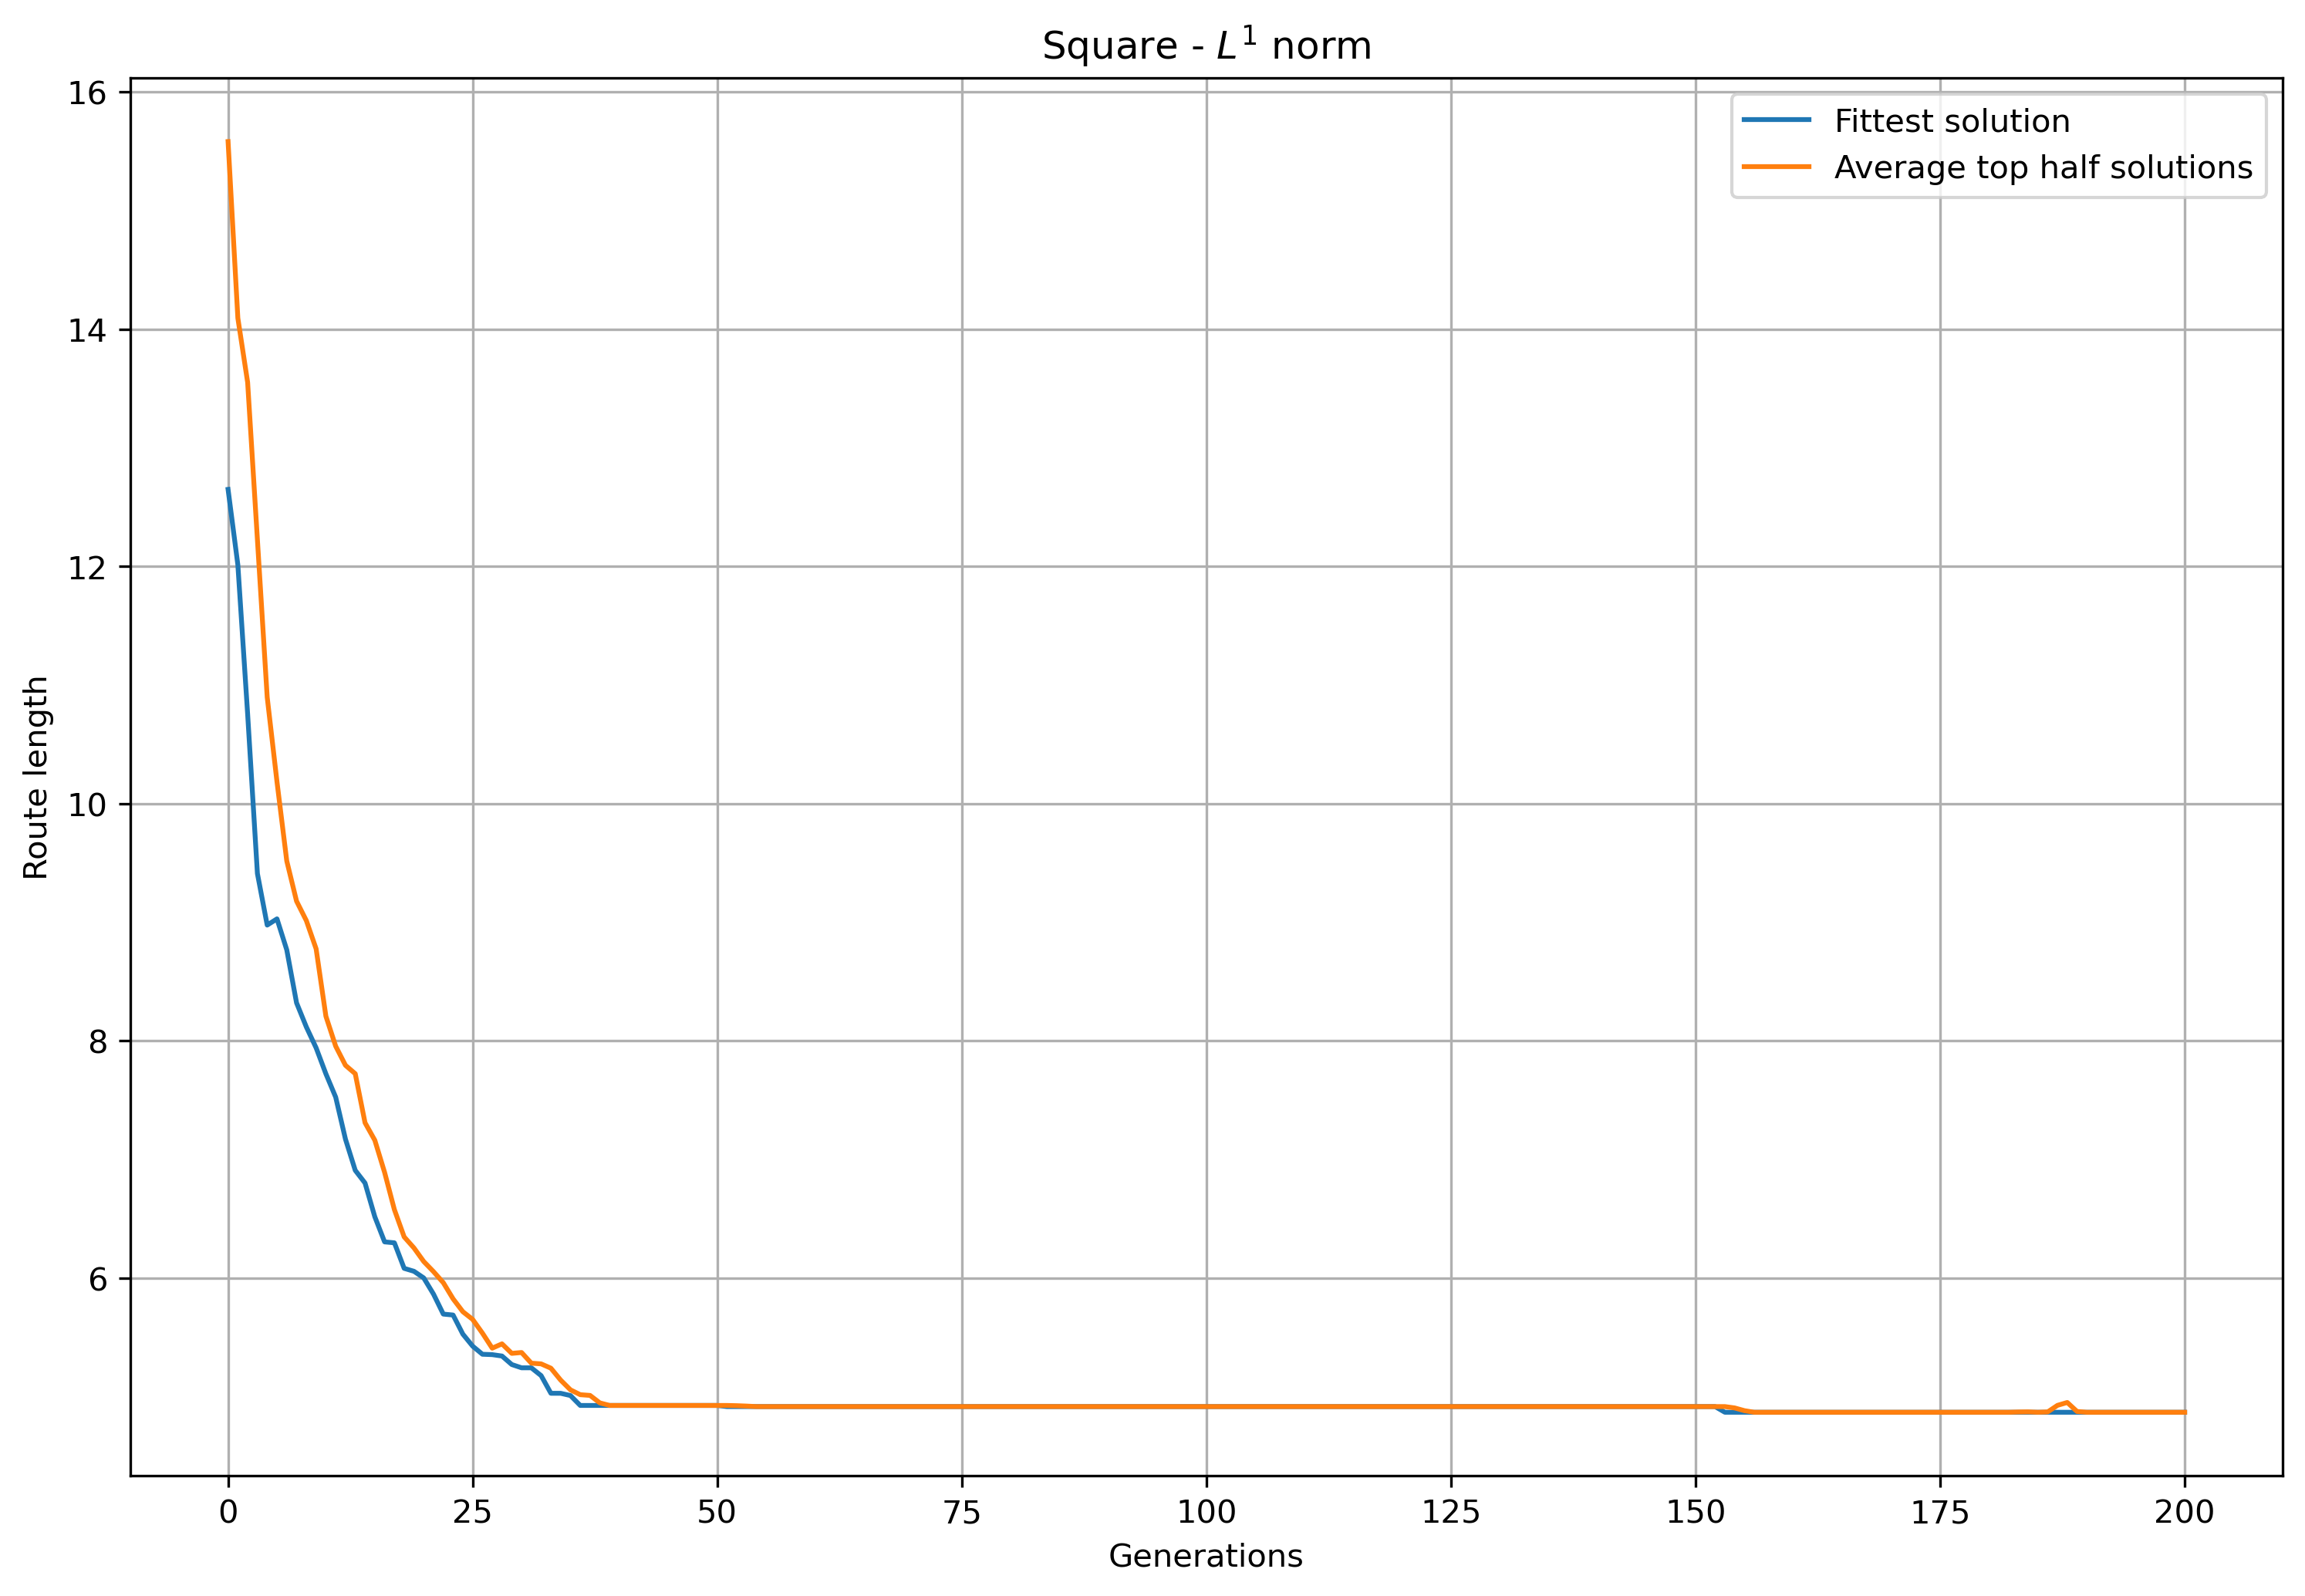

In [7]:
plt.subplots(1,1,figsize=(12,8), dpi=300)
n, f, avf = np.loadtxt("./sol/data/SQUARE/L1/fitness.dat", usecols=(0,1,2), unpack=True)
plt.plot(n,f, label="Fittest solution")
plt.plot(n,avf, label="Average top half solutions")
plt.xlabel("Generations")
plt.ylabel("Route length")
plt.title("Square - $L^1$ norm")
plt.legend()
plt.grid(True)
plt.show()